# **Dogs vs. Cats Redux: Kernels Edition** 
##### K. Neteland - 181210

<img src="https://assets.rebelcircus.com/blog/wp-content/uploads/2017/11/4234234-85.jpg" width="620" height="351" align="center"/>

##### In 2013 Kaggle hosted the original dogs versus cats challenge as a for-fun competition. Rumour has it that the lack of an online coding environment lead to approached sharing by scratching primitive glpyhs on cave walls with sticks and sharp objects. Now the classification problem is reintroduced back on Kaggle as a playground competition with kernels enabled. Although modern techniques may make light of this once-difficult problem, it is through practice of new techniques on old datasets that we will make light of machine learning's future challenges.

##### The rule is simple: The train folder contains 25,000 images of dogs and cats. Each image in this folder has the label as part of the filename. The test folder contains 12,500 images, named according to a numeric id. For each image in the test set, you should predict a probability that the image is a dog (1 = dog, 0 = cat).

### **References**

* ##### __[Kaggle](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition)__ - Source for discussion on data and solutions presented. 
* ##### __[Images and Pixels](https://processing.org/tutorials/pixels/)__ - from the book Learning Processing by Daniel Shiffman.
* ##### __[Kernel - Image processing](https://en.wikipedia.org/wiki/Kernel_(image_processing))__ - Wikipedia.
* ##### __[Introduction to computer vision](http://ai.stanford.edu/~syyeung/cvweb/tutorial1.html)__ - Stanford.edu tutorial - image filtering.
* ##### __[Image Filtering](http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html)__ - Machine Learning Guru.
* ##### __[Activation Functions](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0)__ - Avinash Sharma V.
* ##### __[Neural Networks](https://www.learnopencv.com/neural-networks-a-30000-feet-view-for-beginners/)__ - Learn OpenCV.
* ##### __[Keras](https://keras.io/)__ - Keras documentation.
* ##### __[The Keras Blog](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)__ - Building powerful image classification models using very little data.
* ##### __[CNN - Deep Learning](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)__ - Understanding of Convolutional Neural Network (CNN) — Deep Learning by Prabhu.
* ##### __[CNN in Keras](https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/)__ - Image Classification using Convolutional Neural Networks in Keras.
* ##### __[TensorFlow](https://www.tensorflow.org/guide/low_level_intro)__ - TensorFlow guide.


### **Strategies**

##### From the information given on Kaggle I already have a great deal of knowledge about the data set. The data is pre-divided into a test set of 12 500 images and a training set of 25 000 images equally separated into pictures of dogs and cats. The content of the data is fitting for a classification project, which is also the reason why I chose this particular set since the last assignment was a regression problem. I am curious to work with a different set of tools, learn about CNNs and deep learning in general. 

<img src="http://scikit-learn.org/stable/_static/ml_map.png" width="1061" height="661" align="center"/>

##### Following the flow chart taken from __[scikit-learn](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html?fbclid=IwAR0hJnqIJpjQMpINaXUY1_PHAu0e4TUmQ8WHDbWLj9Ky2SO7VpKxLLcK6rw)__ my data set falls into the Support Vector Machines/Ensemble Classifiers subset within Classification problems. As mentioned earlier this data-set was released on Kaggle in 2013 and was concidered a great challenge at the time given the methods that were available. Since then alot has changed in the world of AI with deep learning models, for example re-introducing the neural network but with more layers and more powerful hardware that lets us computate bigger data-sets which again can lead to more precise models. The DAT158 course gave a quick introduction to Deep Learning without going into too much details about implementation and different frameworks available therefore a big part of this assignment is to study and understand the underlying tecniques and technologies needed. 

##### __The big picture - CNN__

<img src="https://cdn-images-1.medium.com/max/800/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg" width="700" height="236" align="center"/>


 ##### __Images and convolution__

   ##### "A digital image is nothing more than data—numbers indicating variations of red, green, and blue at a particular location on a grid of pixels. Most of the time, we view these pixels as miniature rectangles sandwiched together on a computer screen. With a little creative thinking and some lower level manipulation of pixels with code, however, we can display that information in a myriad of ways." - Daniel Shiffman
    
##### An image matrix consists of pixels with values between 0 - 255. For black/white image, 0 will be black and 255 white. For RGB colour photos an image will have three channels one for each colour representation ranging between 0 - 255 R[0,255], G[0-255] and B[0,255], and each pixel consist of three values representing the colour hue. Note that this will give us 256*256*256 = 16,777,216 combinations of colours. 
##### The example below shows how a greyscale image (one channel) is presented in a matrix. (From Stanford.edu)

<img src="http://ai.stanford.edu/~syyeung/cvweb/Pictures1/imagematrix.png" width="704" height="290" align="center"/>


##### Convolution is the process of adding each element of the image to its local neighbors, weighted by the kernel. This is related to a form of mathematical convolution. It should be noted that the matrix operation being performed - convolution - is not traditional matrix multiplication, despite being similarly denoted by *.

##### For example, if we have two three-by-three matrices, the first a kernel, and the second an image piece, convolution is the process of flipping both the rows and columns of the kernel and then multiplying locally similar entries and summing. The element at coordinates [2, 2] (that is, the central element) of the resulting image would be a weighted combination of all the entries of the image matrix, with weights given by the kernel: 


<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/570600fdeed436d98626278f22bf034ff5ab5162" width="912" height="76" align="center"/>

##### Below is an overview of some common kernels, or filters, being applied to an image:



<img src="https://cdn-images-1.medium.com/max/1600/1*uJpkfkm2Lr72mJtRaqoKZg.png" width="349" height="564" align="center"/>
    


##### Let us apply the knowledge to the dog and cat photo used in the intro of this notebook to further investigate the outcome of a convolution between a kernel and an image. 

In [1]:
#Collection of algorithms for image processing
from skimage import io
import matplotlib.pyplot as plt

#Import the image
img = io.imread('https://assets.rebelcircus.com/blog/wp-content/uploads/2017/11/4234234-85.jpg')

#Print the shape of the image
print('image matrix size: ', img.shape)

#skimage uses range [0,1] instead of [0,255] therefore multiply with 255
print('\n First 5 columns and rows of the image matrix: \n', img[:5, :5]*255)
plt.imshow(img)

image matrix size:  (420, 800, 3)

 First 5 columns and rows of the image matrix: 
 [[[ 40 102 143]
  [ 47 106 148]
  [ 42 101 143]
  [ 36  95 137]
  [ 35  92 135]]

 [[ 50 112 153]
  [ 56 118 159]
  [ 50 109 151]
  [ 41 100 142]
  [ 37  94 137]]

 [[ 48 110 151]
  [ 57 119 160]
  [ 54 115 159]
  [ 47 106 150]
  [ 40  99 143]]

 [[ 37 100 143]
  [ 49 112 155]
  [ 57 118 162]
  [ 54 115 159]
  [ 48 107 151]]

 [[ 39 102 146]
  [ 48 111 155]
  [ 60 123 167]
  [ 62 123 168]
  [ 53 114 158]]]


##### Looking at the matrix we can see that we're dealing with a RGB image. Notice how each pixel consist of three values, each representing the RGB value. For simplicity I'm going to transfer the image to grayscale (one channel)

image matrix size:  (420, 800)

 First 5 columns and rows of the image matrix: 
 [[164.2189 159.5093 164.5093 170.5093 173.0122]
 [154.2189 148.2189 156.5093 165.5093 171.0122]
 [156.2189 147.2189 150.7901 159.3651 166.3651]
 [166.2872 154.2872 147.7901 150.7901 158.3651]
 [164.2151 155.2151 143.2151 142.718  151.7901]]


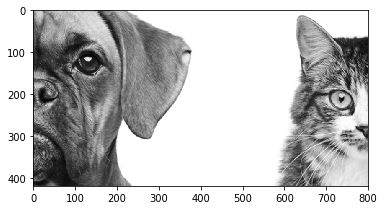

In [2]:
#Import the image and add grayscale
img = io.imread('https://assets.rebelcircus.com/blog/wp-content/uploads/2017/11/4234234-85.jpg', as_gray=True)

#Print the shape of the image
print('image matrix size: ', img.shape) 

#skimage uses range [0,1] instead of [0,255]
print('\n First 5 columns and rows of the image matrix: \n', img[:5, :5]*255) 

#Manually asserting gray scale to image plot since the range adjustment does not apply to the image
plt.imshow(img, cmap='gray') 

##### Notice how the matrix now consist of a single value for each pixel, which makes the convolution process easier. Each kernel, or filter,  presented has a specific task to perform. For example the sharpen kernel accentuate edges but with the cost of adding noise to those area of the image which colors are changing gradually. The output of image convolution is calculated as follows:

  ##### Flip the kernel both horizontally and vertically. As our selected kernel is symetric, the flipped kernel is equal to the original.
  ##### Put the first element of the kernel at every pixel of the image (element of the image matrix). Then each element of the kernel will stand on top of an element of the image matrix.


<img src="http://machinelearninguru.com/_images/topics/computer_vision/basics/convolution/1.JPG" width="688" height="489" align="center"/>

##### The center value of the kernel matrix, called anchor, aligns with each pixel and sums up all product outputs and puts the result at the same position in the output matrix as the center of kernel in image matrix. This highlights a problem for the elements on the boarder of the image since some elements of the kernel might stands out of the image matrix and therefore does not have any corresponding element from the image matrix. We can either choose to ignore the values along the boarder of the image, or we can introduce 0-padding to end up with an output matrix of the same size as the input matrix.  

##### __Apply Sharpen kernel__

image matrix size:  (420, 800)

 First 5 columns and rows of the sharpen matrix: 
 [[507.3663 320.5994 336.0186 349.5157 331.2369]
 [302.4378 123.6381 153.5189 170.1506 163.3064]
 [313.3695 126.5794 143.0671 163.3709 162.2151]
 [356.7148 154.9247 139.868  145.7122 150.0122]
 [348.1456 161.9305 126.1372 127.5796 140.7843]]


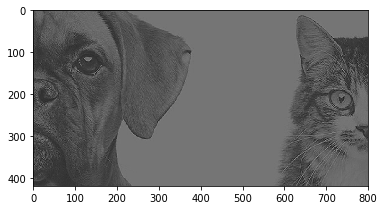

In [3]:
    import numpy as np
    import scipy.signal
    from skimage import io, color
    from skimage import exposure
    
    # Import the image
    img = io.imread('https://assets.rebelcircus.com/blog/wp-content/uploads/2017/11/4234234-85.jpg') 
    
    # Convert the image to grayscale (1 channel)
    img = color.rgb2gray(img) 
    
    # Kernel for sharpen
    kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) 
    
    # If 'valid' is used instead of 'same', then it will not add zero padding
    image_sharpen = scipy.signal.convolve2d(img, kernel, 'same')
    
    # Print out the matrix size
    print('image matrix size: ', image_sharpen.shape) 
    
    print('\n First 5 columns and rows of the sharpen matrix: \n', image_sharpen[:5,:5]*255)
    
    #Manually asserting gray scale to image plot since the range adjustment does not apply to the image
    plt.imshow(image_sharpen, cmap=plt.cm.gist_gray)
    plt.show()

##### The image appears much sharper and the values in the matrix is a product of the sharpen kernel. Scipy added padding and we can verify that the output matrix is the same size as the imput matrix. 

##### __Apply Edge detection kernel__

image matrix size:  (418, 798)

 First 5 columns and rows of the edge_detection matrix: 
 [[-67.4424 -13.5558  12.0018 -26.702    5.7645]
 [-56.5694 -23.3681   7.7895 -14.725    2.2808]
 [  3.3471 -21.2788 -14.0779 -22.2087  -5.7038]
 [ 17.8558 -41.9375 -47.3547 -31.5087 -24.7116]
 [ 18.2826 -16.852  -47.6491   5.6453  11.8442]]


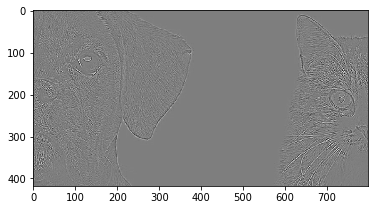

In [4]:
    import numpy as np
    import scipy.signal
    import matplotlib.pyplot as plt
    from skimage import io, color
    from skimage import exposure
    
    # Load the image
    img = io.imread('https://assets.rebelcircus.com/blog/wp-content/uploads/2017/11/4234234-85.jpg')  
    
    # Convert the image to grayscale (1 channel)
    img = color.rgb2gray(img)       
    
    # Kernel for edge detection
    kernel = np.array([[-1,-1,-1],[-1, 8,-1],[-1,-1,-1]]) 
    
    # Not recommended to use padding for edge detection
    edges = scipy.signal.convolve2d(img, kernel, 'valid')
    
    # Print out the matrix size
    print('image matrix size: ', edges.shape) 
    
    print('\n First 5 columns and rows of the edge_detection matrix: \n', edges[:5,:5]*255)
  
    #Manually asserting gray scale to image plot since the range adjustment does not apply to the image
    plt.imshow(edges, cmap=plt.cm.gray)    
    plt.show()

##### We can observe that the edges is clearly standing out compared to what they did when we used the shapen filter. Since we did not add padding this round the output matrix is smaller than the input matrix. 

##### The kernels can be combined to highlight features in our images such as detecting edges, circles ect. Now that I have an understanding of how a convolution between a kernel and an image works it's time to take a closer look at the CNN - Convolutional Neural Network. The CNN is built up of several components, or a predefined order of different components or layers, that can be repeated depending on what depth we're able to process without overfitting our model. The main components are:

* Convolutional Layers
* Activation Functions
* Pooling
* Flatten
* Fully Connected Layers

##### As seen it the Big Picture model we can further divide the operation of a CNN into feature learning and classification. 

##### __Feature Learning__

##### A convolution layer applies a filter/kernel on an image just as I did "manually" with the images in the code above. The convolutional layer has a weight, which is its filter/kernel, and a bias. Each pixel of the output is connected to the input pixels locally instead of being connected to all input pixels (diffence from fully connected layer). Bias in a convolutional layer is a unique scalar value which is added to the output of Convolutional Layer's filter at every single pixel. Generally, a convolution layer can have multiple input channels (each a 2D matrix) and multiple output channels (again each a 2D matrix). Stride, zero-padding, and the depth determine the spatial size of the output in a convolutional layer. The depth is a hyperparameter which is set when you're designing the network (including the convolutional layer) and is equal to the number of filters you want to use. Each filter would be desired to learn different property or aspect of an image. In terms of overfitting your model, if you introduce too many layers the filters might start learning attributes that is not desired, for example it could filter out the dog collar as a feature and as a consequence; dogs without a collar could be predicted as a cat. 

##### Let's crank this up a notch, implement the convolution layer with the edge detection kernel and see how it responds to our tuning of the bias, the stride, difference with or without padding and adding an activation function. This time I'm using the RGB image which will give me 3 input 2D arrays, one for each colour (channel), and one output 2D array. The anchorpoint value from each of the input matrixes are added together with the bias and sent to the output matrix, instead of the 1 : 1 we saw in the example with grayscale images. 

In [5]:
    import matplotlib.pyplot as plt
    from scipy import misc
    import numpy as np
    from skimage import exposure
    from math import ceil
    import imageio

In [6]:

def convoLayer(bias, strides, padding, relu):

    def convolution2d(conv_input, conv_kernel):
        # This function which takes an input (Tensor) and a kernel (Tensor)
        # and returns the convolution of them
        # Args:
        #   conv_input: a numpy array of size [input_height, input_width, input # of channels].
        #   conv_kernel: a numpy array of size [kernel_height, kernel_width, input # of channels]
        #                represents the kernel of the Convolutional Layer's filter.
        #   bias: a scalar value, represents the bias of the Convolutional Layer's filter.
        #   strides: a tuple of (convolution vertical stride, convolution horizontal stride).
        #   padding: type of the padding scheme: 'same' or 'valid'.
        # Returns:
        #   a numpy array (convolution output).
        
        assert len(conv_kernel.shape) == 3, "The size of the kernel should be (kernel_height, kernel_width, input # of channels)"
        assert len(conv_input.shape) == 3, "The size of the input should be (input_height, input_width, input # of channels)"
        assert conv_kernel.shape[2] == conv_input.shape[2], "the input and the kernel should have the same depth."
        
        input_w, input_h = conv_input.shape[1], conv_input.shape[0]      # input_width and input_height
        kernel_w, kernel_h = conv_kernel.shape[1], conv_kernel.shape[0]  # kernel_width and kernel_height
        
        if padding == 'same':
            output_height = int(ceil(float(input_h) / float(strides[0])))
            output_width = int(ceil(float(input_w) / float(strides[1])))
            
            # Calculate the number of zeros which are needed to add as padding
            pad_along_height = max((output_height - 1) * strides[0] + kernel_h - input_h, 0)
            pad_along_width = max((output_width - 1) * strides[1] + kernel_w - input_w, 0)
            pad_top = pad_along_height // 2             # amount of zero padding on the top
            pad_bottom = pad_along_height - pad_top     # amount of zero padding on the bottom
            pad_left = pad_along_width // 2             # amount of zero padding on the left
            pad_right = pad_along_width - pad_left      # amount of zero padding on the right
            
            output = np.zeros((output_height, output_width))  # convolution output
            
            # Add zero padding to the input image
            image_padded = np.zeros((conv_input.shape[0] + pad_along_height,
                                     conv_input.shape[1] + pad_along_width, conv_input.shape[2]))
            image_padded[pad_top:-pad_bottom, pad_left:-pad_right, :] = conv_input
            
            for x in range(output_width):  # Loop over every pixel of the output
                for y in range(output_height):
                    
                    # element-wise multiplication of the kernel and the image
                    output[y, x] = (conv_kernel * image_padded[y * strides[0]:y * strides[0] + kernel_h,
                                    x * strides[1]:x * strides[1] + kernel_w, :]).sum() + bias
        elif padding == 'valid':
            output_height = int(ceil(float(input_h - kernel_h + 1) / float(strides[0])))
            output_width = int(ceil(float(input_w - kernel_w + 1) / float(strides[1])))
            output = np.zeros((output_height, output_width))  # convolution output
            
            for x in range(output_width):  # Loop over every pixel of the output
                for y in range(output_height):
                    
                    # element-wise multiplication of the kernel and the image
                    output[y, x] = (conv_kernel * conv_input[y * strides[0]:y * strides[0] + kernel_h,
                                    x * strides[1]:x * strides[1] + kernel_w, :]).sum() + bias
        
        if relu == False:
            return output
        if relu == True:
            #ReLu
            return np.maximum(output,0)
        
    # load the image as RGB (3 channels)
    img = imageio.imread('https://assets.rebelcircus.com/blog/wp-content/uploads/2017/11/4234234-85.jpg', pilmode="RGB") 

    # Kernel for edge detection
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])[..., None]
    kernel = np.repeat(kernel, 3, axis=2)

    # Convolve image and kernel
    image_edges= convolution2d(img, kernel)
    
    print('image matrix size: ', image_edges.shape)

    print('\n First 5 columns and rows of the image_edge_detection matrix: \n', image_edges[:5,:5])

    # Plot the filtered image
    plt.imshow(image_edges)
    plt.axis('off')
    plt.show()

    # Adjust the contrast of the filtered image by applying Histogram Equalization
    image_edges_equalized = exposure.equalize_adapthist(image_edges / np.max(np.abs(image_edges)), clip_limit=0.03)
    plt.imshow(image_edges_equalized)
    plt.axis('off')
    plt.show()

image matrix size:  (418, 798)

 First 5 columns and rows of the image_edge_detection matrix: 
 [[-194.  -42.   43.  -78.   17.]
 [-160.  -78.   18.  -42.    6.]
 [  13.  -68.  -40.  -65.  -22.]
 [  52. -124. -149.  -90.  -71.]
 [  61.  -47. -138.   10.   40.]]


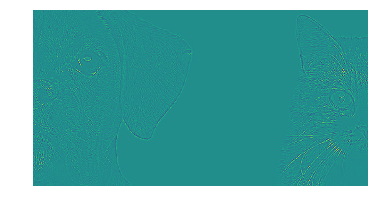

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


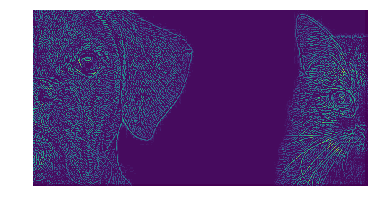

In [7]:
# Bias, Stride, Padding type ['valid', 'same'] and activation function ReLu [True, False]
convoLayer(bias=0.0, strides=(1, 1), padding='valid', relu=False)

##### 1st runthrough with Bias = 0 , Stride = (0,0), no padding and no activation function. Second image have higher contrast to make it easier for us humans to look at. Once again since we didn't add any padding the output matrix is smaller than the input matrices. The values of the output matrix is also different from the other one I did with the edge kernel since this is a 3 channel image and the output values are added together. I haven't mentioned the stride yet, but it's simply the next x-y position of the anchorpoint. In other words; how the kernel transitions through the input matrix. If the stride is (2,1) then it will skip every other pixel in x and hit every pixel in y.  

image matrix size:  (210, 400)

 First 5 columns and rows of the image_edge_detection matrix: 
 [[-193.5   43.5   17.5 -123.5  -43.5]
 [  13.5  -39.5  -21.5  152.5  -59.5]
 [  61.5 -137.5   40.5  -28.5  -39.5]
 [ 194.5 -291.5  156.5 -135.5  -13.5]
 [  89.5  -53.5    2.5  -14.5   31.5]]


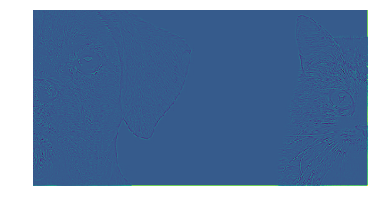

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


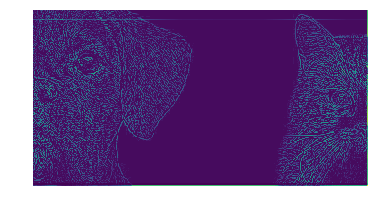

In [8]:
# Bias, Stride, Padding type ['valid', 'same'] and activation function ReLu [True, False]
convoLayer(bias=0.5, strides=(2, 2), padding='same', relu=False)

##### 2nd runthrough with Bias = (0.5), Stride = (2, 2), 0-Padding and no activation function. First of all the bias adds 0.5 to all pixel values as expected, but since we added (2,2) stride the output matrix is half the size. The 1:1 size would be (420, 800) since we added 0-padding. This is very interesting in terms of efficiency. Can we tune our model with stride, compute less data and still get the same result or will it come with a prize of less precision.

image matrix size:  (418, 798)

 First 5 columns and rows of the image_edge_detection matrix: 
 [[ 0.   0.  43.5  0.  17.5]
 [ 0.   0.  18.5  0.   6.5]
 [13.5  0.   0.   0.   0. ]
 [52.5  0.   0.   0.   0. ]
 [61.5  0.   0.  10.5 40.5]]


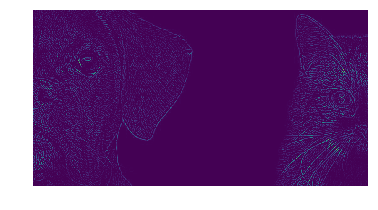

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


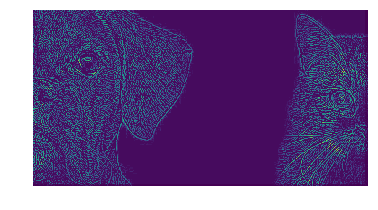

In [9]:
# Bias, Stride, Padding type ['valid', 'same'] and activation function ReLu [True, False]
convoLayer(bias=0.5, strides=(1, 1), padding='valid', relu=True)

##### 3rd runthrough with bias = (0.5), Stride = (1, 1), no padding and ReLu - activation function. Observing the output matrix we can see that several values are set to 0. This is because I used the RELU function to determine which inputs gets sent to the output. Simply put: An activation function decide whether or not a pixel value should be sent to the output matrix based on the anchor point value plus the Bias. There are several activation functions to choose between, all of them have their advantages and drawbacks, but the main purpose for introducing an activation function to your neural network stays the same. 

##### The bread and butter of the Feature Extraction section of the CNN is to determine which features of the input images are most important for us to decide, with a level of certainty, whether it's a dog or a cat. That means that we need to sort which outputs to use, and which outputs we can exclude. Since this assignment is a binary classifier I could simply have used a binary activation function, such as a step function, where the input is mapped to the output iff the value is above a certain threshold. The drawback is that without having any analoge measure of the feature importance the techniques for tuning the network is limited. 

##### To get the basic idea of how the neural network learns, let’s say that the desired output of the network is Y. The neural network produces an output Y'. The difference between the predicted output and the desired output (Y - Y') is converted to the loss function metric ( J ). The loss is high when the neural network makes a lot of mistakes, and it is low when it makes fewer mistakes. The goal of the training process is to find the weights and bias that minimise the loss function over the training set.

##### In the figure below, the loss function is shaped like a bowl. At any point in the training process, the partial derivatives of the loss function with respect to the weights is nothing but the slope of the bowl at that location. By moving in the direction predicted by the partial derivatives, we can reach the bottom of the bowl and therefore minimize the loss function. This idea of using the partial derivatives of a function to iteratively find its local minimum is called the gradient descent.


<img src="https://www.learnopencv.com/wp-content/uploads/2017/10/gradient-descent-2d-diagram.png" width="700" height="394" align="center"/>


##### In Artificial neural networks the weights are updated using a method called Backpropagation. The partial derivatives of the loss function with respect to the weights are used to update the weights. In a sense, the error is backpropagated in the network using derivatives. This is done in an iterative manner and after many iterations, the loss reaches a minimum value, and the derivative of the loss becomes zero.

##### Let's take a closer look at the ReLu, rectified linear unit, we used in the convolution layer, A(x) = max(0,x). What this function do is basically give an output x if the value of x is positive and 0 otherwise something that we observed from the output matrix. 

<img src="https://cdn-images-1.medium.com/max/800/0*vGJq0cIuvTB9dvf5." width="311" height="210" align="center"/>

##### The ReLu is linear for all positive input values and zero for all negative values which makes it faster than functions that slopes such as Sigmoid or Tanh. A ReLU neuron is “dead” if it’s stuck in the negative side and always outputs 0. Because the slope of ReLU in the negative range is also 0, once a neuron gets negative, it’s unlikely for it to recover. Such neurons are not playing any role in discriminating the input and is essentially useless. Over the time you may end up with a large part of your network doing nothing. As long as not all of them are negative, we can still get a slope out of ReLU. The dying problem is likely to occur when learning rate is too high or there is a large negative bias. A leaky ReLu y = 0.01x when x < 0 will fix the problem with the dying neurons. 

##### The Pooling layer is mostly used immediately after the convolutional layer to reduce the spatial size (only width and height, not depth). This reduces the number of parameters, hence computation is reduced. Using fewer parameters avoids overfitting. The most common form of pooling is Max pooling where we take a kernel and apply the maximum operation over the sized part of the image.

<img src="https://www.learnopencv.com/wp-content/uploads/2017/11/max-pooling-demo.jpg" width="700" height="394" align="center"/>

##### Max pool layer with filter size 2×2 and stride 2 is shown. The output is the max value in a 2×2 region shown using encircled digits.

##### __Classification__

##### At the end of a CNN, the output of the last Pooling Layer acts as input to the so called Fully Connected Layer. There can be one or more of these layers (“fully connected” means that every node in the first layer is connected to every node in the second layer). Fully Connected layers perform classification based on the features extracted by the previous layers. Typically, this layer is a traditional ANN containing a softmax activation function, which outputs a probability (a number ranging from 0-1) for each of the classification labels the model is trying to predict.

<img src="https://qph.fs.quoracdn.net/main-qimg-f0bdb4944b34daeb43b99232f845c8e1" width="810" height="382" align="center"/>

##### Now that some of the basics are covered it's time to start creating a model for the Dogs vs Cats dataset. Thankfully there are several tools available for the job so it's not necessary to implement every component manually as done above. I've chosen to use Keras with TensorFlow as backend to create, observe and tune my model. 

##### Keras provides a very simple workflow for training and evaluating the models. It is described with the following diagram:

<img src="https://www.learnopencv.com/wp-content/uploads/2017/09/keras-workflow.jpg" width="700" height="394" align="center"/>

##### Keras is a model-level library, providing high-level building blocks for developing deep learning models. It does not handle itself low-level operations such as tensor products, convolutions and so on. Instead, it relies on a specialized, well-optimized tensor manipulation library to do so, serving as the "backend engine" of Keras. Rather than picking one single tensor library and making the implementation of Keras tied to that library, Keras handles the problem in a modular way, and several different backend engines can be plugged seamlessly into Keras. I'm using TensorFlow a tensor manipulation framework developed by Google.


### **Prerequisitions**

##### **HW:**
##### __[GTX 1080Ti](https://developer.nvidia.com/cuda-gpus)__
##### **Environments:**
##### __[Linux - Ubuntu](https://www.ubuntu.com/)__
##### __[CUDA 9.2](https://docs.nvidia.com/cuda/archive/9.2/)__
##### __[Nvidia Docker](https://github.com/NVIDIA/nvidia-docker)__
##### __[Docker ML Environment](https://github.com/181192/P030-MLDockerEnv)__
##### **DATA:**
##### __[Dataset](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data)__


### **Setup**

In [15]:
import os, cv2, re, random #os for file path, cv2 for OpenCV - image processing
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker

import seaborn as sns # Nicer graphs
%matplotlib inline
from sklearn.model_selection import train_test_split
#from skimage import data

#import tensorflow as tf
#sess = tf.Session()

from keras import backend as K
#K.set_session(sess)

from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras.layers import Input, Conv2D, Activation, MaxPooling2D, Dense #Dense == Fully Connected Layer, Activation == Layer with activation function.
from keras.models import Sequential #Let's us stack up the layers one by one
from keras.optimizers import RMSprop #Adjust step size for gradient descent
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping #To be able to: save model between epocs, view stats during testing, stop if metric is not improving
from keras.utils import np_utils #Numpy utils for Keras


### **Get the data**

In [68]:
TRAIN_DIR = 'data/train/' #Importing data
TEST_DIR = 'data/test/'


ROWS = 64 # Number of rows after image resize
COLS = 64 # Number of columns after image resize
CHANNELS = 3 # RGB

img_width = 150
img_height = 150

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # Full dataset
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]
test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

# Cut off part of test set from 50 % of training data to 25 %
#random.shuffle(test_images)
#test_images =  test_images[:6250]

def prepare_data(list_of_images):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    x = [] # images as arrays
    y = [] # labels
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
    
    for i in list_of_images:
        if 'dog' in i:
            y.append(1)
        elif 'cat' in i:
            y.append(0)
            
    return x, y

X,Y = prepare_data(train_images)

### **Gain insights**

In [67]:
# Checking Keras set-up

# "channels_last" assumes (rows, cols, channels)
print("Image properties: " + K.image_data_format()) 
# Tensorflow is default backend to Keras, can also use Theano or cntk
print("Backend: " + K.backend())

Image properties: channels_last
Backend: tensorflow


Since K.image_data_format() is channel_last, input_shape to the first keras layer will be (img_width, img_height, 3).

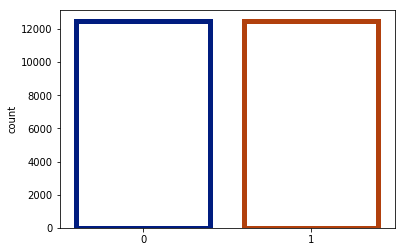

In [64]:
sns.countplot(Y, facecolor=(0,0,0,0), linewidth=5, edgecolor=sns.color_palette("dark", 3))

##### The training data is evenly distributed with 12 500 dogs and cats. Sample 5 cats and dogs below.

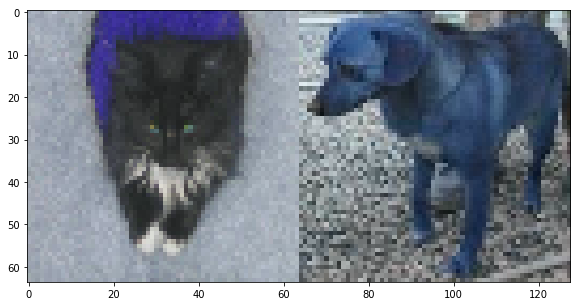

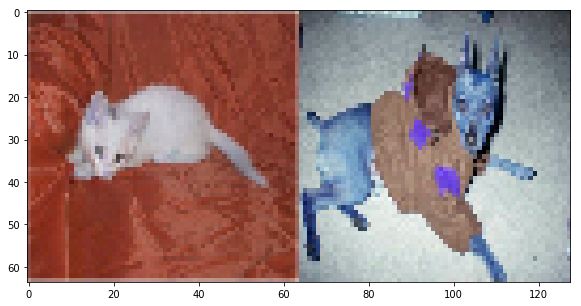

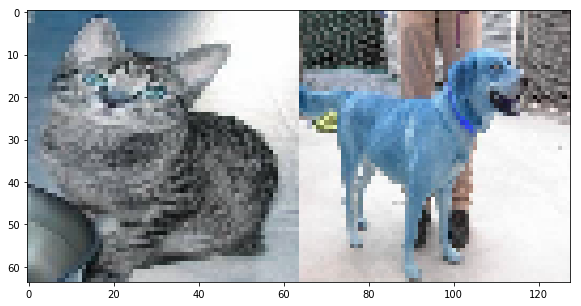

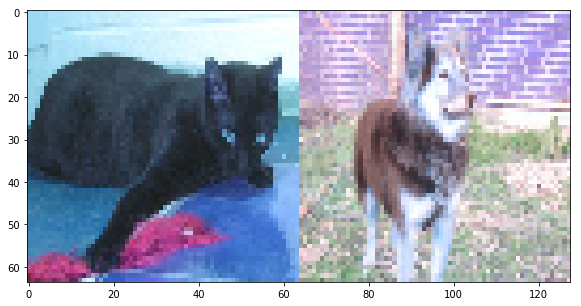

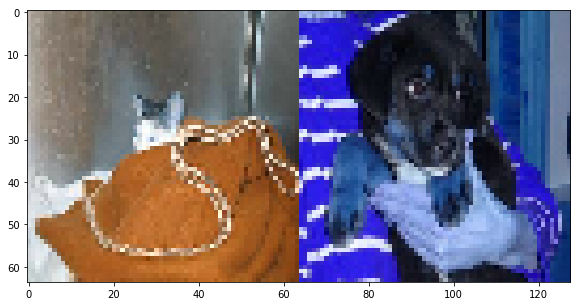

In [57]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) 
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

def show_cats_and_dogs(idx):
    cat = read_image(train_cats[idx])
    dog = read_image(train_dogs[idx])
    pair = np.concatenate((cat, dog), axis=1)
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
    
for idx in range(0,5):
    show_cats_and_dogs(idx)

### **Prepare the data**

In [72]:
# Creating a 20 % validation set out of the training set

X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.2, random_state=1)

In [74]:
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)

### **Select model and train**

In [77]:
def catdog():
    model = models.Sequential()

    model.add(layers.Conv2D(32,(3,3), input_shape=(img_width, img_height, 3)))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    model.add(layers.Conv2D(32, (3, 3)))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (3, 3)))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(128, (3, 3)))
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.add(layers.Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

model = catdog()

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_13 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
__________

In [78]:
nb_epoch = 10
batch_size = 100

## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')        
        
def run_catdog():
    
    history = LossHistory()
    model.fit(X, Y, batch_size=batch_size, nb_epoch=nb_epoch,
              validation_split=0.25, verbose=0, shuffle=True, callbacks=[history, early_stopping])
    

    predictions = model.predict(test, verbose=0)
    return predictions, history

predictions, history = run_catdog()

NameError: name 'train' is not defined

### **Fine tuning**

##### Tune hyperparameters, loss function, back propagation, look at and evaluate the outcome of the model -> overfitting? Less layers? Max Pooling? ect

### **Present solution**

##### Submissions are scored on the log loss:

##### LogLoss=−1n∑i=1n[yilog(y^i)+(1−yi)log(1−y^i)],

##### where

* #####    n     : is the number of images in the test set
* #####    y^i   : is the predicted probability of the image being a dog
* #####    yi    : is 1 if the image is a dog, 0 if cat
* #####    log() : is the natural (base e) logarithm

##### A smaller log loss is better.

##### For each image in the test set, you must submit a probability that image is a dog. The file should have a header and be in the following format:

##### id,label
##### 1,0.5
##### 2,0.5
##### 3,0.5
##### ...

### **Conclusion**

##### This model is based on binary classification of dog and cat images. Transferred learning to another binary classification project could be applicable. The obvious weakness is that if the model is presented with a photo that is not of either a dog or a cat its limitation would classify it as one or another due to the architecture of the network. If it's not a dog, it's a cat and vice verca.